In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy.typing as npt
import matplotlib.pyplot as plt

#TODO
- fazer plot da legenda ficar sempre no canto superior esquerdo
- por titulo na legenda dizendo qual variṕavel esta avriando
- pegar chave e valor de valores fixos de forma mais elegante

In [42]:
def plot_empirical_error_convergence(loss: npt.NDArray[np.float_], nn_config: dict, not_fixed_param: str, annotate: bool = False) -> None:
    sns.set(style="darkgrid", color_codes=True, rc={"figure.figsize": (8, 5)})
    ax = sns.lineplot(data=loss, markers=True, marker="o", label=f"{nn_config[not_fixed_param]}")

    del nn_config[not_fixed_param]
    keys = list(nn_config.keys())
    vls = list(nn_config.values())

    plt.xticks(np.arange(len(loss)))
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(title=not_fixed_param, fontsize=10)
    plt.title(f"Convergence of empirical error\n{keys[0]} = {vls[0]} , {keys[1]} = {vls[1]}")
    if annotate:
        for i, j in enumerate(loss):
            ax.annotate(str(np.round(j, 2)), xy=(i, j), xytext=(i, j + 0.02))

In [43]:
def plot_fixed(results: pd.DataFrame, hidden_layer_size: np.int_ = None, batch_size: np.int_ = None, learning_rate: np.float_ = None, annotate: bool = False) -> None:
    if hidden_layer_size is None and batch_size is None and learning_rate is None:
        raise "Especifique quais métricas devem ser fixadas"
    not_fixed: str = ""
    
    if hidden_layer_size and batch_size:
        aux: pd.DataFrame = results.query(f"hidden_layer_size == {hidden_layer_size} and batch_size == {batch_size}")[["learning_rate", "history"]]
        not_fixed = "learning_rate"
        for i in range(aux.shape[0]):
            e = aux.iloc[i]
            plot_empirical_error_convergence(loss=e.history["loss"], nn_config={"hidden_layer_size": hidden_layer_size, "batch_size": batch_size, "learning_rate": e.learning_rate}, not_fixed_param=not_fixed, annotate=annotate)
    
    if hidden_layer_size and learning_rate:
        aux: pd.DataFrame = results.query(f"hidden_layer_size == {hidden_layer_size} and learning_rate == {learning_rate}")[["batch_size", "history"]]
        not_fixed = "batch_size"
        for i in range(aux.shape[0]):
            e = aux.iloc[i]
            plot_empirical_error_convergence(loss=e.history["loss"], nn_config={"hidden_layer_size": hidden_layer_size, "batch_size": e.batch_size, "learning_rate": learning_rate}, not_fixed_param=not_fixed, annotate=annotate)
    
    if learning_rate and batch_size:
        aux: pd.DataFrame = results.query(f"batch_size == {batch_size} and learning_rate == {learning_rate}")[["hidden_layer_size", "history"]]
        not_fixed = "hidden_layer_size"
        for i in range(aux.shape[0]):
            e = aux.iloc[i]
            plot_empirical_error_convergence(loss=e.history["loss"], nn_config={"hidden_layer_size": e.hidden_layer_size, "batch_size": batch_size, "learning_rate": learning_rate}, not_fixed_param=not_fixed, annotate=annotate)

In [44]:
results: pd.DataFrame = pd.read_json("data/results.json")
results.nlargest(columns=["accuracy_score"], n=10)

,accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,random_state_seed,test_size,hidden_layer_size,batch_size,learning_rate,history
28,0.944,"[1.0, 0.92, 0.955555555555555, 0.9019607843137...","[1.0, 0.958333333333333, 0.877551020408163, 0....","[1.0, 0.9387755102040811, 0.914893617021276, 0...","[[47, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 46, 0, 2...",42,0.1,100,10,1.0,"{'loss': [0.6937848329544061, 0.30101156234741..."
31,0.942,"[1.0, 0.9387755102040811, 0.9387755102040811, ...","[1.0, 0.958333333333333, 0.9387755102040811, 0...","[1.0, 0.9484536082474221, 0.9387755102040811, ...","[[47, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 46, 0, 2...",42,0.1,100,50,1.0,"{'loss': [1.041361570358276, 0.429597705602645..."
16,0.940,"[1.0, 0.9387755102040811, 0.9166666666666661, ...","[1.0, 0.958333333333333, 0.897959183673469, 0....","[1.0, 0.9484536082474221, 0.90721649484536, 0....","[[47, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 46, 1, 1...",42,0.1,50,10,1.0,"{'loss': [0.650378823280334, 0.286384433507919..."
19,0.936,"[1.0, 0.958333333333333, 0.9574468085106381, 0...","[1.0, 0.958333333333333, 0.9183673469387751, 0...","[1.0, 0.958333333333333, 0.9375000000000001, 0...","[[47, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 46, 0, 2...",42,0.1,50,50,1.0,"{'loss': [0.9621272683143611, 0.43892532587051..."
18,0.934,"[1.0, 0.958333333333333, 0.9183673469387751, 0...","[1.0, 0.958333333333333, 0.9183673469387751, 1...","[1.0, 0.958333333333333, 0.9183673469387751, 0...","[[47, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 46, 0, 2...",42,0.1,50,50,0.5,"{'loss': [1.20004117488861, 0.546654641628265,..."
27,0.934,"[0.9791666666666661, 0.9387755102040811, 0.956...","[1.0, 0.958333333333333, 0.897959183673469, 0....","[0.9894736842105261, 0.9484536082474221, 0.926...","[[47, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 46, 0, 2...",42,0.1,100,10,0.5,"{'loss': [0.7018574476242061, 0.31702584028244..."
15,0.932,"[1.0, 0.958333333333333, 0.9166666666666661, 0...","[0.9787234042553191, 0.958333333333333, 0.8979...","[0.9892473118279571, 0.958333333333333, 0.9072...","[[46, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 46, 0, 2...",42,0.1,50,10,0.5,"{'loss': [0.6900514960289, 0.32455769181251504..."
3,0.928,"[0.9791666666666661, 0.9019607843137251, 1.0, ...","[1.0, 0.958333333333333, 0.877551020408163, 1....","[0.9894736842105261, 0.9292929292929291, 0.934...","[[47, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 46, 0, 2...",42,0.1,25,10,0.5,"{'loss': [0.718543529510498, 0.363922119140625..."
30,0.924,"[1.0, 0.958333333333333, 0.8518518518518511, 0...","[0.9787234042553191, 0.958333333333333, 0.9387...","[0.9892473118279571, 0.958333333333333, 0.8932...","[[46, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 46, 0, 2...",42,0.1,100,50,0.5,"{'loss': [1.141941785812378, 0.516914308071136..."
7,0.922,"[0.9791666666666661, 0.9019607843137251, 1.0, ...","[1.0, 0.958333333333333, 0.9183673469387751, 0...","[0.9894736842105261, 0.9292929292929291, 0.957...","[[47, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 46, 0, 1...",42,0.1,25,50,1.0,"{'loss': [0.9952848553657531, 0.44954124093055..."


In [47]:
results.nsmallest(columns=["accuracy_score"], n=5)[["hidden_layer_size", "batch_size", "learning_rate","accuracy_score"]].set_index(np.arange(5) + 1).to_latex()

/tmp/ipykernel_17969/4259484348.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  results.nsmallest(columns=["accuracy_score"], n=5)[["hidden_layer_size", "batch_size", "learning_rate","accuracy_score"]].set_index(np.arange(5) + 1).to_latex()


'\\begin{tabular}{lrrrr}\n\\toprule\n{} &  hidden\\_layer\\_size &  batch\\_size &  learning\\_rate &  accuracy\\_score \\\\\n\\midrule\n1 &                 25 &           1 &           10.0 &           0.094 \\\\\n2 &                100 &        4500 &           10.0 &           0.100 \\\\\n3 &                100 &           1 &           10.0 &           0.108 \\\\\n4 &                 50 &           1 &           10.0 &           0.146 \\\\\n5 &                 25 &        4500 &           10.0 &           0.226 \\\\\n\\bottomrule\n\\end{tabular}\n'

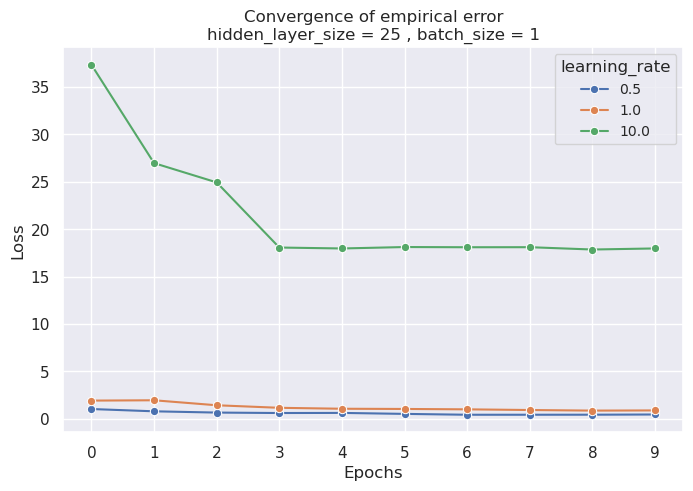

In [46]:
ex = results.iloc[0]
plot_fixed(results=results, hidden_layer_size=ex["hidden_layer_size"], batch_size=ex["batch_size"], learning_rate=None)